 <font size="4"> <div align="center">
  SVD Decomposition for Eigenfaces Bases
</div></font>

## Q1: Import the olivetti_faces dataset and plot the 40$^{th}$ image in the dataset

10 Points

Data matrix shape: (4096, 400)
Label matrix shape: (400,)


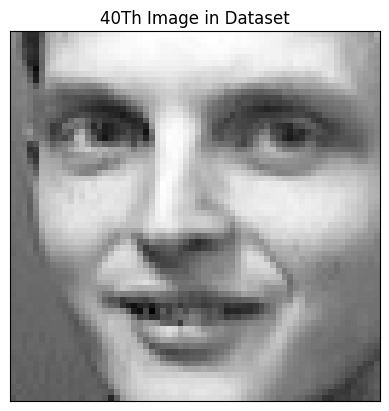

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.io as sio

# Load the faces dataset
face,labels = fetch_olivetti_faces(return_X_y=True, shuffle=True)
faces = face.T
print(f'Data matrix shape: {faces.shape}')
print(f'Label matrix shape: {labels.shape}')

sio.savemat("face.mat", {"array": face})
sio.savemat("labels.mat", {"array": labels})

# here we plot the image
img = faces[:,39].reshape(64,64)
plt.imshow(img,cmap = 'gray')
plt.title('40Th Image in Dataset')
plt.xticks([])
plt.yticks([]);

## Q2:  Plot the average face of the person with ID: 10

20 Points

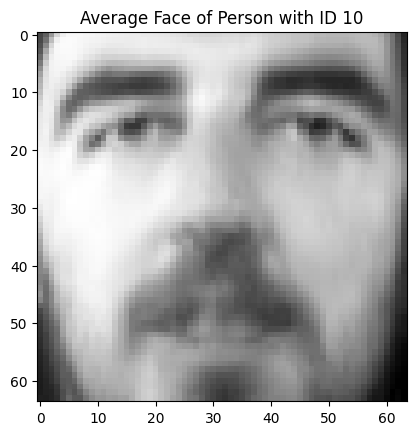

In [ ]:
# Select the images of the person with ID 10
images_of_person_10 = faces[:,labels == 10]

# Calculate the average face
average_face = images_of_person_10.mean(axis = 1).reshape(64,64)

# Plot the average face
plt.imshow(average_face, cmap='gray')
plt.title('Average Face of Person with ID 10')
plt.show()


## Q3: Divide the dataset into matrices train and test with 20% of images in the test matrix. Hence train matrix will have 320 images and test matrix will have 80 images

10 Points

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( face, labels, test_size=0.2, random_state=42, stratify = labels)

print("Training images:", X_train.shape)
print("Testing images:", X_test.shape)

Training images: (320, 4096)
Testing images: (80, 4096)


In [ ]:
faces_train_X = X_train.T
faces_test_X = X_test.T
faces_train_y = y_train
faces_test_y = y_test

## Q4: Do a SVD decomposition of the train matrix containing images as columns (4096 x 320) and obtain matrices U, S and V

10 Points

In [ ]:
mean_face = faces_train_X.mean(axis = 1).reshape(64,64)
faces_train_X_centered = faces_train_X - mean_face.reshape(-1,1)
faces_train_X_centered.shape

U, s, V = np.linalg.svd(faces_train_X_centered,full_matrices=False)
S = np.diag(s)

## Q5: Using just matrices U, S and V, reconstruct the first image in the train matrix and plot it

10 Points

In [ ]:
def reconstruct_train(args,rank = 0):
    index,U,S,V,mean_face = args
    # Getting the coordinates
    wts = S@V
    relv_wts = wts[:,index]
    approx = U[:, :rank] @ relv_wts[:rank]
    approx = approx.reshape(64,64)+mean_face
    plt.imshow(approx, cmap='gray')
    plt.title(f'Rank of Approximation: {rank}')
    plt.xticks([])
    plt.yticks([])
    plt.show()

index = 0
args = [index,U,S,V,mean_face]
interact(reconstruct_train,args = fixed(args),rank = (0,len(s),1))
plt.show()

interactive(children=(IntSlider(value=0, description='rank', max=320), Output()), _dom_classes=('widget-intera…

## Q6: Assuming U to be a basis for the column space of train matrix, find the coordinate of projection (encoding) of the first image in the test matrix on this basis

20 Points

In [ ]:
def face_encoding(img,U,rank):
    encoding = U[:,:rank].T@img.reshape(-1,1)
    return encoding

## Q7: Using U and the coordinate of projection in Q6, reconstruct the first image in the test set and plot it

10 Points

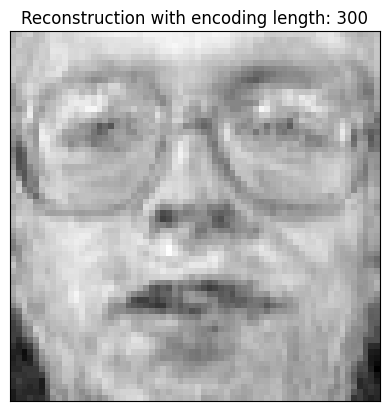

In [ ]:
def face_reconstruct(encoding,U):
    len_encoding = len(encoding)
    reconstruct = U[:,:len_encoding] @ encoding
    img = reconstruct.reshape(64,64)
    plt.imshow(img, cmap='gray')
    plt.title(f'Reconstruction with encoding length: {len_encoding}')
    plt.xticks([])
    plt.yticks([])
    plt.show()

encoding = face_encoding(faces_test_X[:,index],U,rank = 300)
#encoding

face_reconstruct(encoding,U)